#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,val_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 7s 197us/step - loss: 2.1652 - accuracy: 0.2014 - val_loss: 2.0542 - val_accuracy: 0.2969
Epoch 2/12
37500/37500 [==============================] - 5s 133us/step - loss: 1.9510 - accuracy: 0.2994 - val_loss: 1.9519 - val_accuracy: 0.3379
Epoch 3/12
37500/37500 [==============================] - 5s 132us/step - loss: 1.8249 - accuracy: 0.3506 - val_loss: 1.8229 - val_accuracy: 0.3962
Epoch 4/12
37500/37500 [==============================] - 5s 133us/step - loss: 1.7225 - accuracy: 0.3871 - val_loss: 1.7422 - val_accuracy: 0.4198
Epoch 5/12
37500/37500 [==============================] - 5s 132us/step - loss: 1.6389 - accuracy: 0.4163 - val_loss: 1.6563 - val_accuracy: 0.4543
Epoch 6/12
37500/37500 [==============================] - 5s 133us/step - loss: 1.5692 - accuracy: 0.4373 - val_loss: 1.6102 - val_accuracy: 0.4682
Epoch 7/12
37500/37500 [==============================] - 5s 1

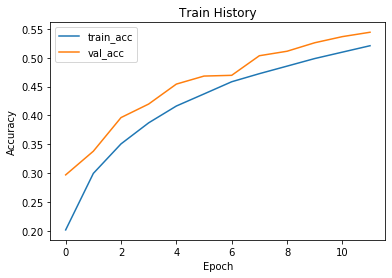

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    
show_train_history('accuracy','val_accuracy')
# 作業:
# 請分別選用 "MSE", "binary _crossentropy"
# 查看Train/test accurancy and loss rate


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 5s 145us/step - loss: 0.0606 - accuracy: 0.5329 - val_loss: 0.0629 - val_accuracy: 0.5444
Epoch 2/12
37500/37500 [==============================] - 5s 139us/step - loss: 0.0603 - accuracy: 0.5331 - val_loss: 0.0628 - val_accuracy: 0.5457
Epoch 3/12
37500/37500 [==============================] - 5s 140us/step - loss: 0.0603 - accuracy: 0.5336 - val_loss: 0.0627 - val_accuracy: 0.5474
Epoch 4/12
37500/37500 [==============================] - 5s 142us/step - loss: 0.0601 - accuracy: 0.5365 - val_loss: 0.0627 - val_accuracy: 0.5466
Epoch 5/12
37500/37500 [==============================] - 5s 137us/step - loss: 0.0601 - accuracy: 0.5345 - val_loss: 0.0626 - val_accuracy: 0.5486
Epoch 6/12
37500/37500 [==============================] - 5s 137us/step - loss: 0.0600 - accuracy: 0.5342 - val_loss: 0.0625 - val_accuracy: 0.5478
Epoch 7/12
37500/37500 [==============================] - 5s 1

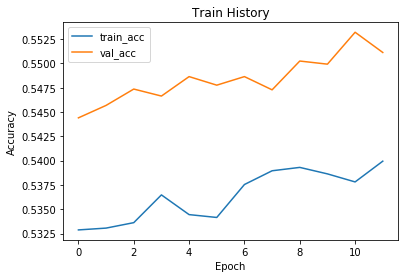

In [27]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    
show_train_history('accuracy','val_accuracy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 5s 146us/step - loss: 0.2026 - accuracy: 0.9207 - val_loss: 0.2120 - val_accuracy: 0.9154
Epoch 2/12
37500/37500 [==============================] - 5s 137us/step - loss: 0.2019 - accuracy: 0.9210 - val_loss: 0.2119 - val_accuracy: 0.9156
Epoch 3/12
37500/37500 [==============================] - 5s 139us/step - loss: 0.2013 - accuracy: 0.9210 - val_loss: 0.2111 - val_accuracy: 0.9160
Epoch 4/12
37500/37500 [==============================] - 5s 138us/step - loss: 0.2009 - accuracy: 0.9214 - val_loss: 0.2108 - val_accuracy: 0.9160
Epoch 5/12
37500/37500 [==============================] - 5s 139us/step - loss: 0.2010 - accuracy: 0.9210 - val_loss: 0.2103 - val_accuracy: 0.9163
Epoch 6/12
37500/37500 [==============================] - 5s 137us/step - loss: 0.2008 - accuracy: 0.9210 - val_loss: 0.2104 - val_accuracy: 0.9160
Epoch 7/12
37500/37500 [==============================] - 5s 1

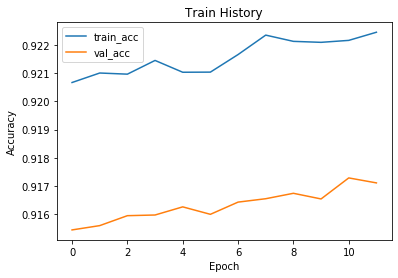

In [28]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    
show_train_history('accuracy','val_accuracy')